## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from os import listdir
from os.path import isfile, join
import random
from random import randint

### Train Inputs

Sample no. 0 has shape  (16, 256, 256)
Sample no. 1 has shape  (14, 256, 256)
Sample no. 2 has shape  (18, 256, 256)
Sample no. 3 has shape  (16, 256, 256)
Sample no. 4 has shape  (14, 256, 256)
Sample no. 5 has shape  (19, 256, 256)
Sample no. 6 has shape  (16, 256, 256)
Sample no. 7 has shape  (14, 256, 256)
Sample no. 8 has shape  (15, 256, 256)
Sample no. 9 has shape  (18, 256, 256)
Images from sample no. 0: 


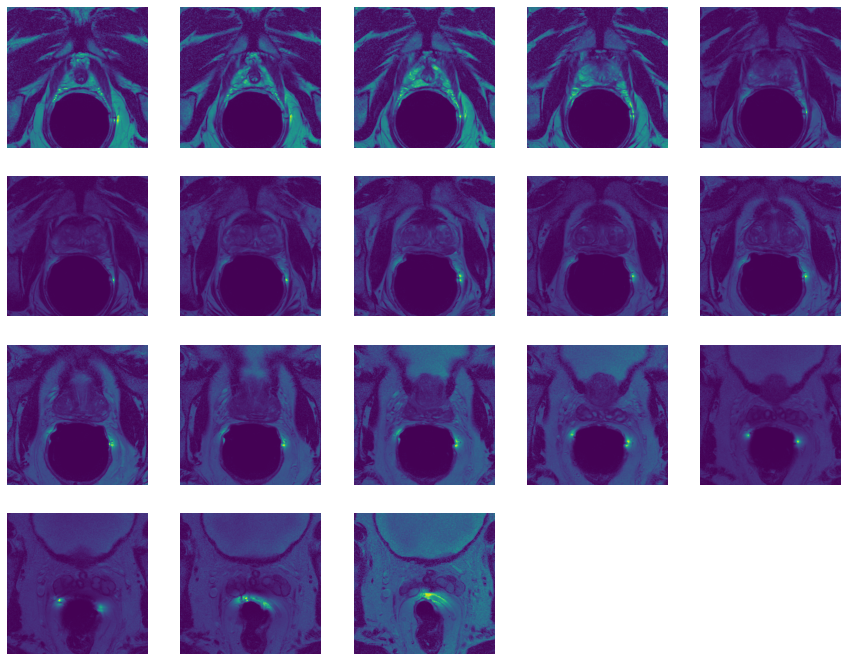

In [2]:
for sample_num in range(0, 10):
    sample = np.load("../input/train_images/sample-" + str(sample_num) + ".npy")
    print("Sample no. " + str(sample_num) + " has shape ", sample.shape)

print("Images from sample no. 0: ")
plt.figure(figsize=(15, 15)) 
for i in range(sample.shape[0]):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(sample[i, :, :])
    plt.axis('off')
    
plt.show()

### Take-Aways:
1. Samples have different number of "slices"
2. All samples have image- / slice-dimensions 256x256

### Train Labels:

Labeling no. 0 has shape  (16, 256, 256)
Labeling no. 1 has shape  (14, 256, 256)
Labeling no. 2 has shape  (18, 256, 256)
Labeling no. 3 has shape  (16, 256, 256)
Labeling no. 4 has shape  (14, 256, 256)
Labeling no. 5 has shape  (19, 256, 256)
Labeling no. 6 has shape  (16, 256, 256)
Labeling no. 7 has shape  (14, 256, 256)
Labeling no. 8 has shape  (15, 256, 256)
Labeling no. 9 has shape  (18, 256, 256)
Images for labeling no. 0: 


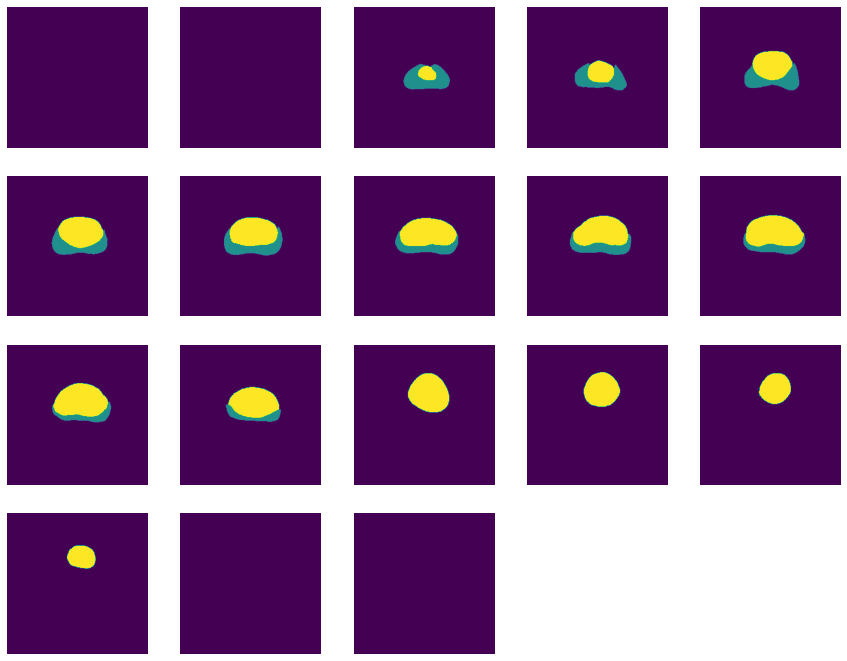

In [3]:
for sample_num in range(0, 10):
    sample = np.load("../input/train_labels/sample-" + str(sample_num) + ".npy")
    print("Labeling no. " + str(sample_num) + " has shape ", sample.shape)

print("Images for labeling no. 0: ")
plt.figure(figsize=(15, 15)) 
for i in range(sample.shape[0]):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(sample[i, :, :])
    plt.axis('off')
    
plt.show()

### Take-Aways:
1. Train labelings have exact same dimensions as inputs.
2. Output can be described with 3 classes

### Overlay:

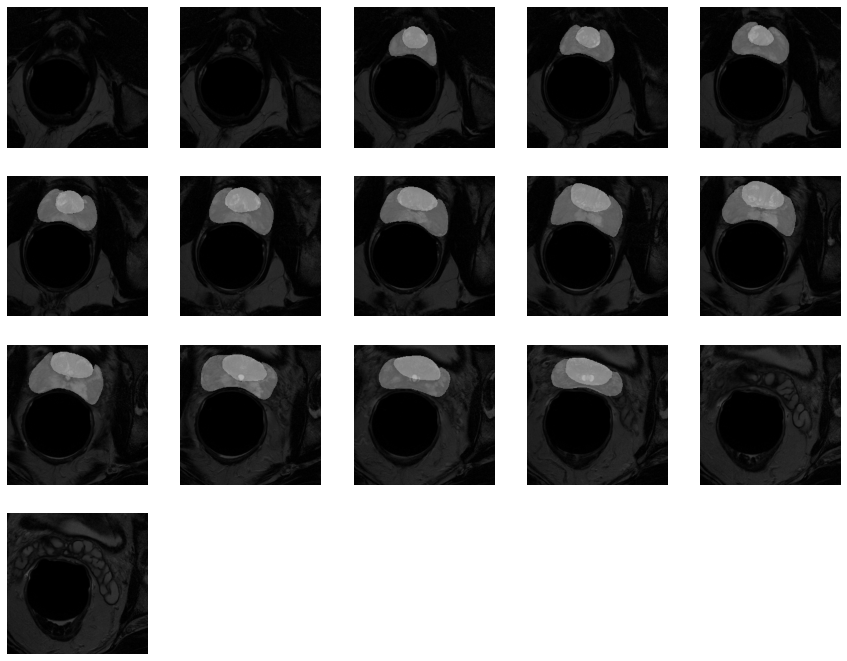

In [4]:
sample = np.load("../input/train_images/sample-0.npy")
label = np.load("../input/train_labels/sample-0.npy")

plt.figure(figsize=(15, 15))
for i in range(label.shape[0]):
    background = Image.fromarray(sample[i, :, :]).convert("RGBA")
    temp = label[i, :, :]
    temp[temp == 1] = 150
    temp[temp == 2] = 255
    overlay = Image.fromarray(temp).convert("RGBA")
    new_img = Image.blend(background, overlay, 0.5)
     
    plt.subplot(5, 5, 1 + i)
    plt.imshow(new_img)
    plt.axis('off')
    
plt.show()

### Randomly Rotated Test Images:

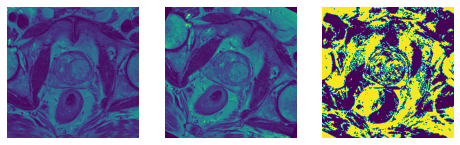

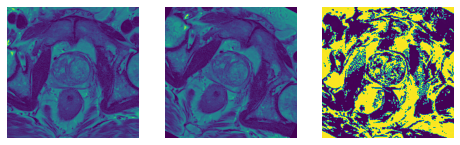

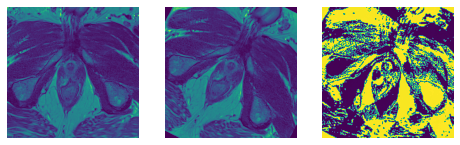

In [5]:
sample_num = 54
test_sample = np.load("../input/test_images/sample-" + str(sample_num) + ".npy")
rot_test_sample = np.load("../input/test_images_randomly_rotated/sample-" + str(sample_num) + ".npy")

assert test_sample.shape == rot_test_sample.shape, "Dimension Mismatch !"

for i in range(0, 3):
    fig = plt.figure(figsize=(8, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(test_sample[i, :, :])
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(rot_test_sample[i, :, :])
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(rot_test_sample[i, :, :] - test_sample[i, :, :])
    plt.axis('off')
    plt.show()
    

### Take-Aways:
1. Rotation is as expected

## Basic statistics about Labelings:
We plot the distribution of train labelings by their percentage of zero (background) pixels.

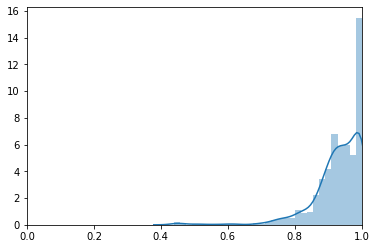

In [6]:
train_labelings_path = "../input/train_labels/"
train_labelings_files = [join(train_labelings_path, f) for f in listdir(train_labelings_path)
                         if isfile(join(train_labelings_path, f)) and f.endswith("npy")]
train_labelings_files.sort()

class_counts = [0., 0., 0.]
perc_zeros = []
for label_file in train_labelings_files:
    labeling = np.load(label_file)
    for slice_id in range(labeling.shape[0]):
        m_slice = labeling[slice_id, :, :]
        class_counts[0] += (m_slice==0).sum()
        class_counts[1] += (m_slice==1).sum()
        class_counts[2] += (m_slice==2).sum()
        perc_zeros.append(np.count_nonzero(m_slice == 0) / np.count_nonzero(m_slice != -1))

sns.distplot(perc_zeros)
plt.gca().set_xlim(0, 1)
plt.show()

Class statistics:
Class 0: 93.49% of all pixels
Class 1: 2.08% of all pixels
Class 2: 4.43% of all pixels


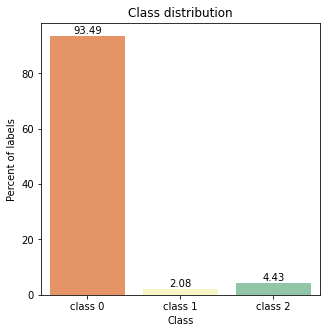

In [7]:
print("Class statistics:")
total = class_counts[0] + class_counts[1] + class_counts[2]
c_0 = class_counts[0] * 100 / total
c_1 = class_counts[1] * 100 / total
c_2 = class_counts[2] * 100 / total
print("Class 0: {0:.2f}% of all pixels".format(c_0))
print("Class 1: {0:.2f}% of all pixels".format(c_1))
print("Class 2: {0:.2f}% of all pixels".format(c_2))

stats = pd.DataFrame({"Class": ["class 0", "class 1", "class 2"], 
                      "Percent of labels":[c_0, c_1, c_2]})

fig = plt.figure(figsize=(5, 5))
splot = sns.barplot(x="Class", y="Percent of labels", data=stats, palette="Spectral")
plt.title("Class distribution")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### Take-Aways:
1. Pictures are heavily imbalanced
2. A considerable portion of pictures is just background
3. Custom loss functions to address this imbalance should be considered

## Spatial Distribution of Classes:

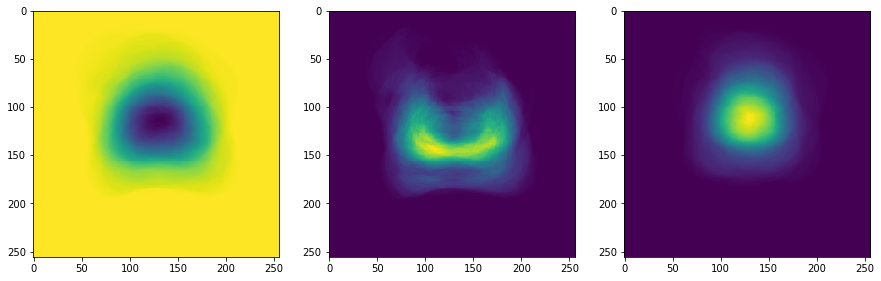

In [8]:
train_labelings_path = "../input/train_labels/"
train_labelings_files = [join(train_labelings_path, f) for f in listdir(train_labelings_path)
                         if isfile(join(train_labelings_path, f)) and f.endswith("npy")]
train_labelings_files.sort()

zeros_dist = np.zeros((256, 256))
ones_dist = np.zeros((256, 256))
twos_dist = np.zeros((256, 256))

class_idx_to_hotmap = [zeros_dist, ones_dist, twos_dist]

for label_file in train_labelings_files:
    labeling = np.load(label_file)
    if labeling.shape[1] != 256 or labeling.shape[2] != 256:
        continue
    for slice_id in range(labeling.shape[0]):
        m_slice = labeling[slice_id, :, :]
        for i in range(256):
            for j in range(256):
                class_idx_to_hotmap[m_slice[i, j]][i, j] += 1
                
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(zeros_dist)
plt.subplot(1, 3, 2)
plt.imshow(ones_dist)
plt.subplot(1, 3, 3)
plt.imshow(twos_dist)
plt.show()

### Take-Aways:
1. Spatial distribution underlines class imbalance
2. Except for a few outliers, the relevant regions seem to be in the top middle section of the images.